<a href="https://colab.research.google.com/github/vkgithub1556/AirbnbProject/blob/master/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
age_gen_df = pd.read_csv("/content/drive/My Drive/Data/airbnb/age_gender_bkts.csv")
age_gen_df.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [ ]:
age_gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


FInding average of each age group and adding as another column

In [ ]:
age_gen_df['age_bucket']=age_gen_df['age_bucket'].apply(lambda x: '100-104' if x == '100+' else x)
age_gen_df['mean_age']=age_gen_df['age_bucket'].apply(lambda x: (int(x.split('-')[0])+int(x.split('-')[1]))/2)

In [ ]:
age_gen_df=age_gen_df.drop({'age_bucket','year'},axis=1)

In [ ]:
age_gen_df

,country_destination,gender,population_in_thousands,mean_age
0,AU,male,1.0,102.0
1,AU,male,9.0,97.0
2,AU,male,47.0,92.0
3,AU,male,118.0,87.0
4,AU,male,199.0,82.0
...,...,...,...,...
415,US,male,115.0,97.0
416,US,male,541.0,92.0
417,US,female,10570.0,17.0
418,US,male,1441.0,87.0


List of all destination countries and their counts

In [ ]:
list(age_gen_df['country_destination'].unique())
age_gen_df['country_destination'].value_counts()

NL    42
FR    42
PT    42
CA    42
US    42
ES    42
DE    42
AU    42
IT    42
GB    42
Name: country_destination, dtype: int64

In [ ]:
age_gen_df['gender'].value_counts()

female    210
male      210
Name: gender, dtype: int64

making gender values as gategorical values replacinf male with 0 and female with 1

In [ ]:
age_gen_df['gender']=age_gen_df['gender'].apply(lambda x:0 if x =='male' else 1)
age_gen_df['gender'].value_counts()

1    210
0    210
Name: gender, dtype: int64

Reading countries data

In [ ]:
countries = pd.read_csv('/content/drive/My Drive/Data/airbnb/countries.csv')

In [ ]:
countries.head(20)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


Reading sessions data

In [ ]:
sessions=pd.read_csv('/content/drive/My Drive/Data/airbnb/sessions.csv')

In [ ]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [ ]:
sessions.shape

(10567737, 6)

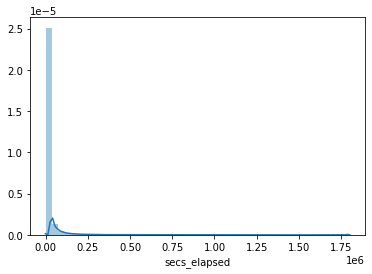

In [ ]:
sns.distplot(sessions[sessions['secs_elapsed'].notnull()]['secs_elapsed'])

In [ ]:
sessions['secs_elapsed'].describe()

count    1.043171e+07
mean     1.940581e+04
std      8.888424e+04
min      0.000000e+00
25%      2.290000e+02
50%      1.147000e+03
75%      8.444000e+03
max      1.799977e+06
Name: secs_elapsed, dtype: float64

In [ ]:
len(sessions[sessions['secs_elapsed'].isnull()])

136031

In [ ]:
median_session=sessions['secs_elapsed'].median()

In [ ]:
sessions['secs_elapsed']=sessions['secs_elapsed'].fillna(median_session)

In [ ]:
sessions['secs_elapsed'].describe()

count    1.056774e+07
mean     1.917078e+04
std      8.833430e+04
min      0.000000e+00
25%      2.370000e+02
50%      1.147000e+03
75%      8.193000e+03
max      1.799977e+06
Name: secs_elapsed, dtype: float64

As can be seen above, the interpolation has not significantly altered the summary statistics of the distribution. This is a good option for filling in the null values for the time being.



Let us check sessions which donot have any actions

In [ ]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [ ]:
no_action=sessions[(sessions['action'].isnull())|(sessions['action_detail'].isnull())|(sessions['action_type'].isnull())]

In [ ]:
no_action.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [ ]:
no_action.shape

(1205830, 6)

Device types used to access irbnb

In [ ]:
sessions['device_type'].value_counts()

Mac Desktop                         3594286
Windows Desktop                     2658539
iPhone                              2105031
Android Phone                        839637
iPad Tablet                          683414
Android App Unknown Phone/Tablet     273652
-unknown-                            211279
Tablet                               139886
Linux Desktop                         28373
Chromebook                            22348
iPodtouch                              8198
Windows Phone                          2047
Blackberry                              979
Opera Phone                              68
Name: device_type, dtype: int64

activities without any device information

In [ ]:
len(sessions[sessions['device_type'].isnull()])

0

These are no sessions from unknown devices

**let us now analyse training users data for which we have to prediction their first destination**

In [ ]:
train_users=pd.read_csv("/content/drive/My Drive/Data/airbnb/train_users_2.csv")
train_users.head()


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


replacing unknown values in gender and first browser 

In [ ]:
train_users['gender']=train_users['gender'].replace('-unknown-',np.nan)
train_users['first_browser']=train_users['first_browser'].replace('-unknown-',np.nan)

In [ ]:
train_users[train_users['age']>120]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination


We can see there are age values much greater than 104. these wrong age values will affect the analysis so let us replace these values with NAN

In [ ]:
train_users['age']=train_users['age'].apply(lambda x:np.nan if x>120 else x)

In [ ]:
train_users[train_users['age']>115]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination


Finding all the columns which have null values

In [ ]:
train_users.isna().any()

id                         False
date_account_created       False
timestamp_first_active     False
date_first_booking          True
gender                      True
age                         True
signup_method              False
signup_flow                False
language                   False
affiliate_channel          False
affiliate_provider         False
first_affiliate_tracked     True
signup_app                 False
first_device_type          False
first_browser               True
country_destination        False
dtype: bool

Changing data type of date

In [ ]:
df_accounts=train_users.groupby('date_account_created')['id'].count().reset_index()
df_accounts['date_account_created'] = df_accounts['date_account_created'].astype('datetime64[ns]') 

Number of new accounts created each year

In [ ]:
df_accounts['date_account_created'].dt.year.value_counts()


2012    366
2013    365
2011    365
2010    357
2014    181
Name: date_account_created, dtype: int64

Statistical Analysis on the data